In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#descargamos los datos
df=pd.read_csv('aguaprieta2',skiprows=20,skipfooter=1, sep='\s+',header=None,
               names=['DD/MM/YY','PRECIP','EVAP','TMAX','TMIN'],engine='python')

In [3]:

df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/YY'], 1), dayfirst=True)
df=df.drop(['DD/MM/YY'],1)

In [4]:
df.dtypes


PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
FECHA     datetime64[ns]
dtype: object

In [5]:
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA
0,0.0,NaN,19.5,2.0,1961-02-01
1,0.0,NaN,20.0,2.5,1961-02-02
2,0.0,2.7,21.5,1.8,1961-02-03
3,0.0,3.0,16.7,1.0,1961-02-04
4,0.0,1.3,11.4,4.0,1961-02-05


In [6]:
df.describe()

,PRECIP,EVAP,TMAX,TMIN
count,16733.000000,12277.000000,16446.000000,16435.000000
mean,0.955698,5.679653,26.371555,8.596580
std,4.043399,3.137320,8.018800,7.895741
min,0.000000,0.000000,-3.500000,-19.500000
25%,0.000000,3.100000,20.000000,2.000000
50%,0.000000,5.300000,27.000000,8.000000
75%,0.000000,7.900000,33.000000,16.000000
max,70.000000,17.600000,45.000000,27.000000


In [7]:
df['MES'] = df['FECHA'].dt.month

In [8]:
df['AÑO']=df['FECHA'].dt.year

In [9]:
df.head()


,PRECIP,EVAP,TMAX,TMIN,FECHA,MES,AÑO
0,0.0,NaN,19.5,2.0,1961-02-01,2,1961
1,0.0,NaN,20.0,2.5,1961-02-02,2,1961
2,0.0,2.7,21.5,1.8,1961-02-03,2,1961
3,0.0,3.0,16.7,1.0,1961-02-04,2,1961
4,0.0,1.3,11.4,4.0,1961-02-05,2,1961


In [16]:
for i in range(1,13):
        PRECIPMENS =  df.loc[df['MES'] == i, 'PRECIP'].mean()
        print('MES',i,np.round(PRECIPMENS,decimals=1),'mm')

MES 1 0.6 mm
MES 2 0.6 mm
MES 3 0.3 mm
MES 4 0.2 mm
MES 5 0.2 mm
MES 6 0.4 mm
MES 7 3.0 mm
MES 8 2.6 mm
MES 9 1.4 mm
MES 10 0.8 mm
MES 11 0.6 mm
MES 12 0.9 mm


In [18]:
PROM_PRECIP=(0.6,0.6,0.3,0.2,0.2,0.4,3,2.6,1.4,0.8,0.6,0.9)

In [32]:
ind = np.arange(len(PROM_PRECIP))  # the x locations for the groups
width = 0.35  # the width of the bars

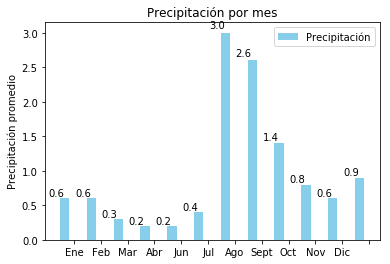

In [42]:
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width, PROM_PRECIP, width,
                color='SkyBlue', label='Precipitación')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precipitación promedio')
ax.set_title('Precipitación por mes')
ax.set_xticks(ind)
ax.set_xticklabels(('Ene', 'Feb', 'Mar', 'Abr', 'Jun','Jul','Ago','Sept','Oct','Nov'
                   ,'Dic'))
ax.legend()

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")


plt.show()